In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('./music_genre.csv')

In [3]:
# Clean table of instance_id, artist_name, track_name, key, mode, and obtained_date
df = df.drop(['instance_id', 'artist_name', 'track_name', 'key', 'mode', 'obtained_date'], axis=1)

# Clean table of songs with negative duration
negative_lengths = df[df['duration_ms'] < 0].index
df.drop(negative_lengths, inplace=True)

# Clean table of songs with unknown tempo
unknown_tempo = df[df['tempo'] == '?'].index
df.drop(unknown_tempo, inplace=True)

# Clean table of songs with NaN values
df = df.dropna(subset=['popularity', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'music_genre'])

# Round tempos
def df_value_round(x):
    x = float(x)
    return round(x)

df['tempo'] = df['tempo'].apply(df_value_round)

# convert duration_ms to durastion_secs
def ms_to_s(x):
    x = float(x)
    return x / 1000

df['duration_ms'] = df['duration_ms'].apply(ms_to_s)
df = df.rename(columns={'duration_ms': 'duration_secs'})

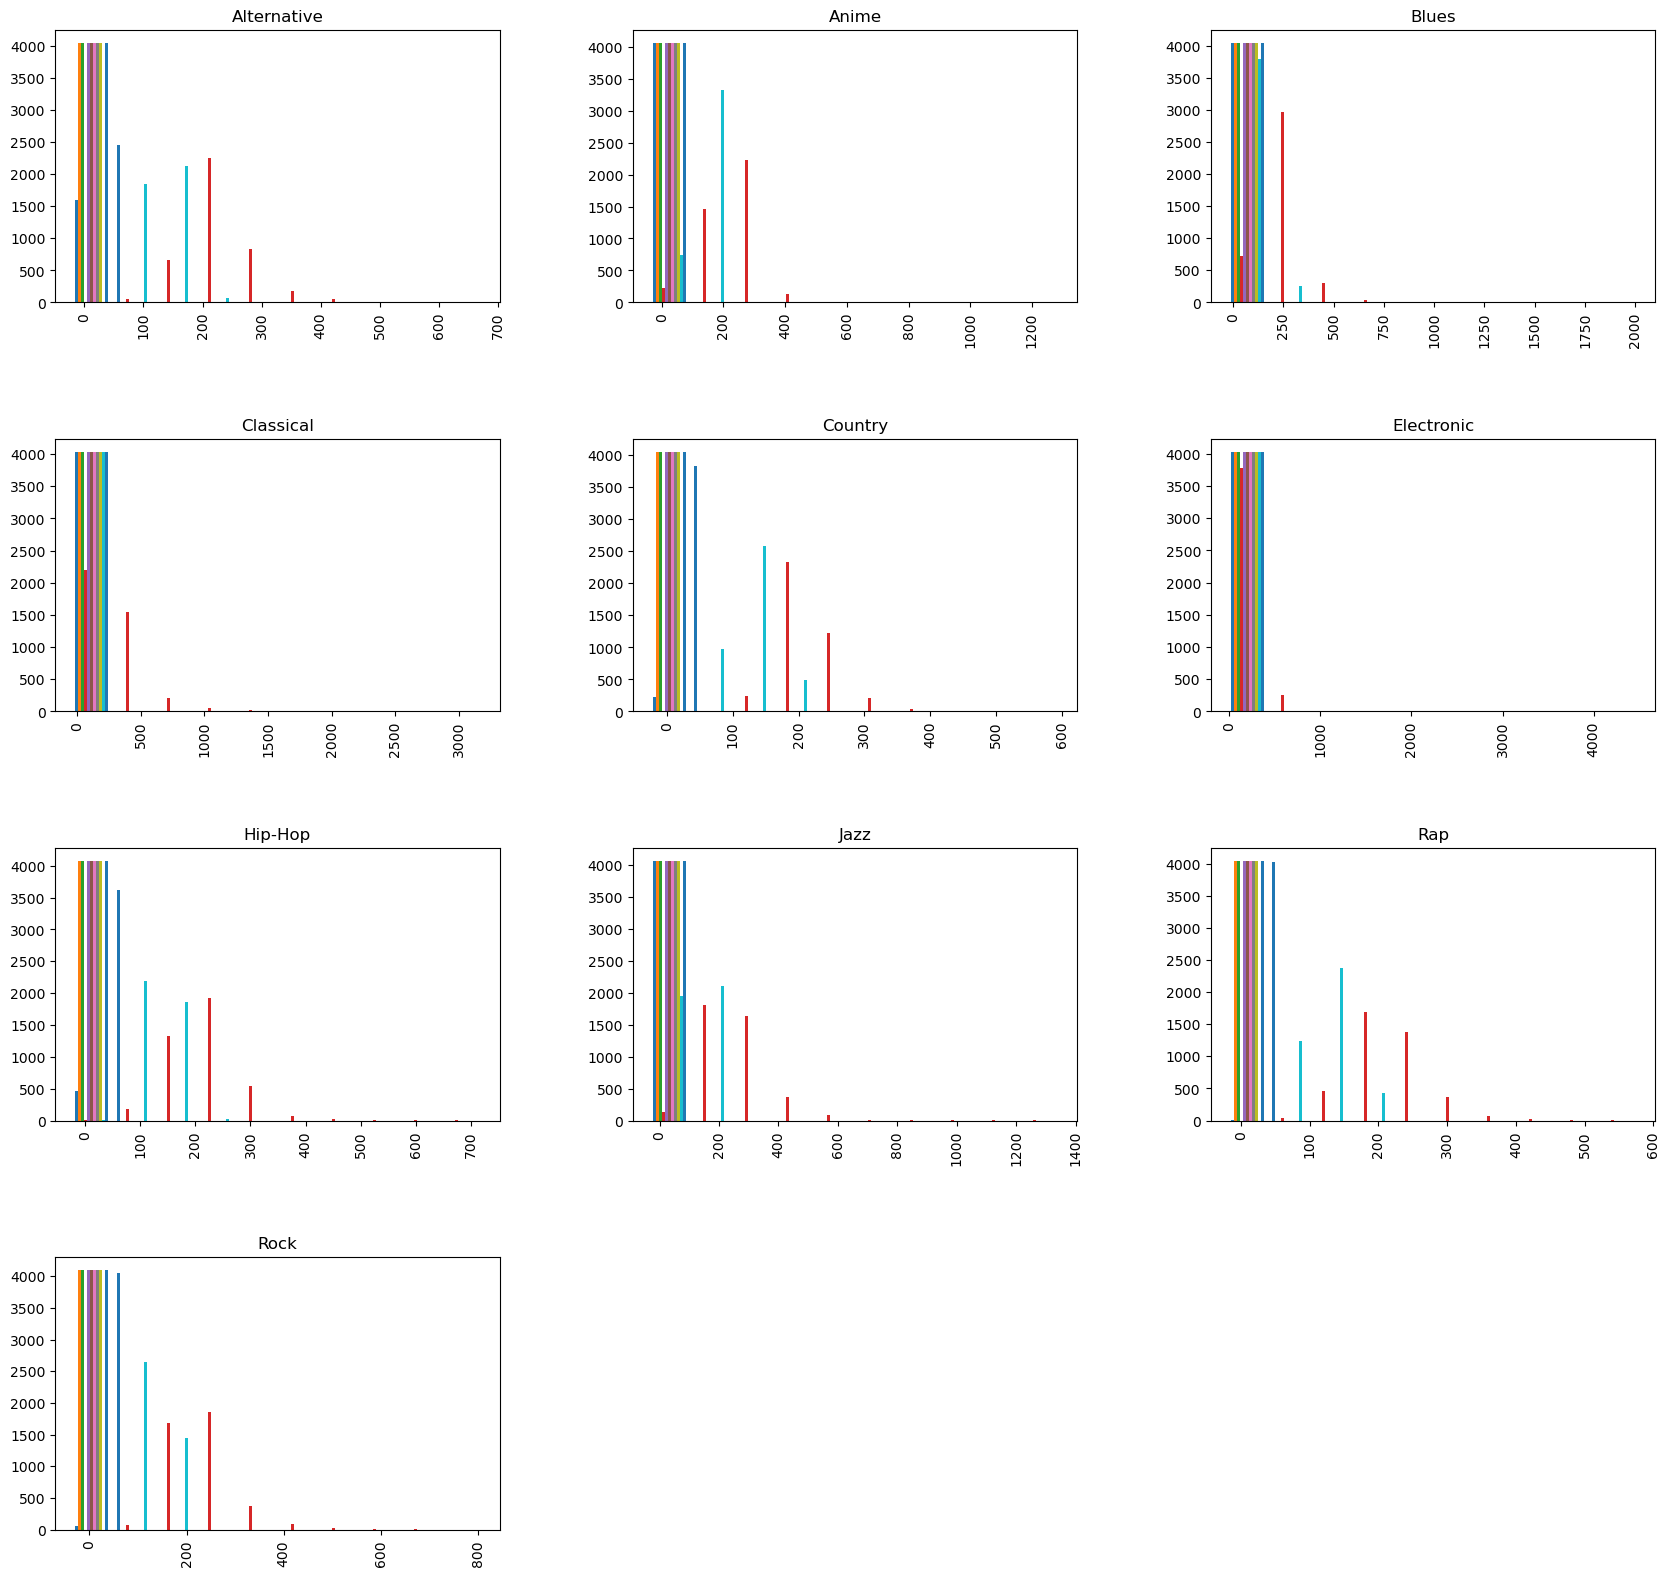

In [4]:
# histograms of each genre
df.hist(by=df['music_genre'], figsize = (20,20));

In [5]:
# split data into test and train
train_df, test_df = train_test_split(df, test_size=.25, shuffle=True)

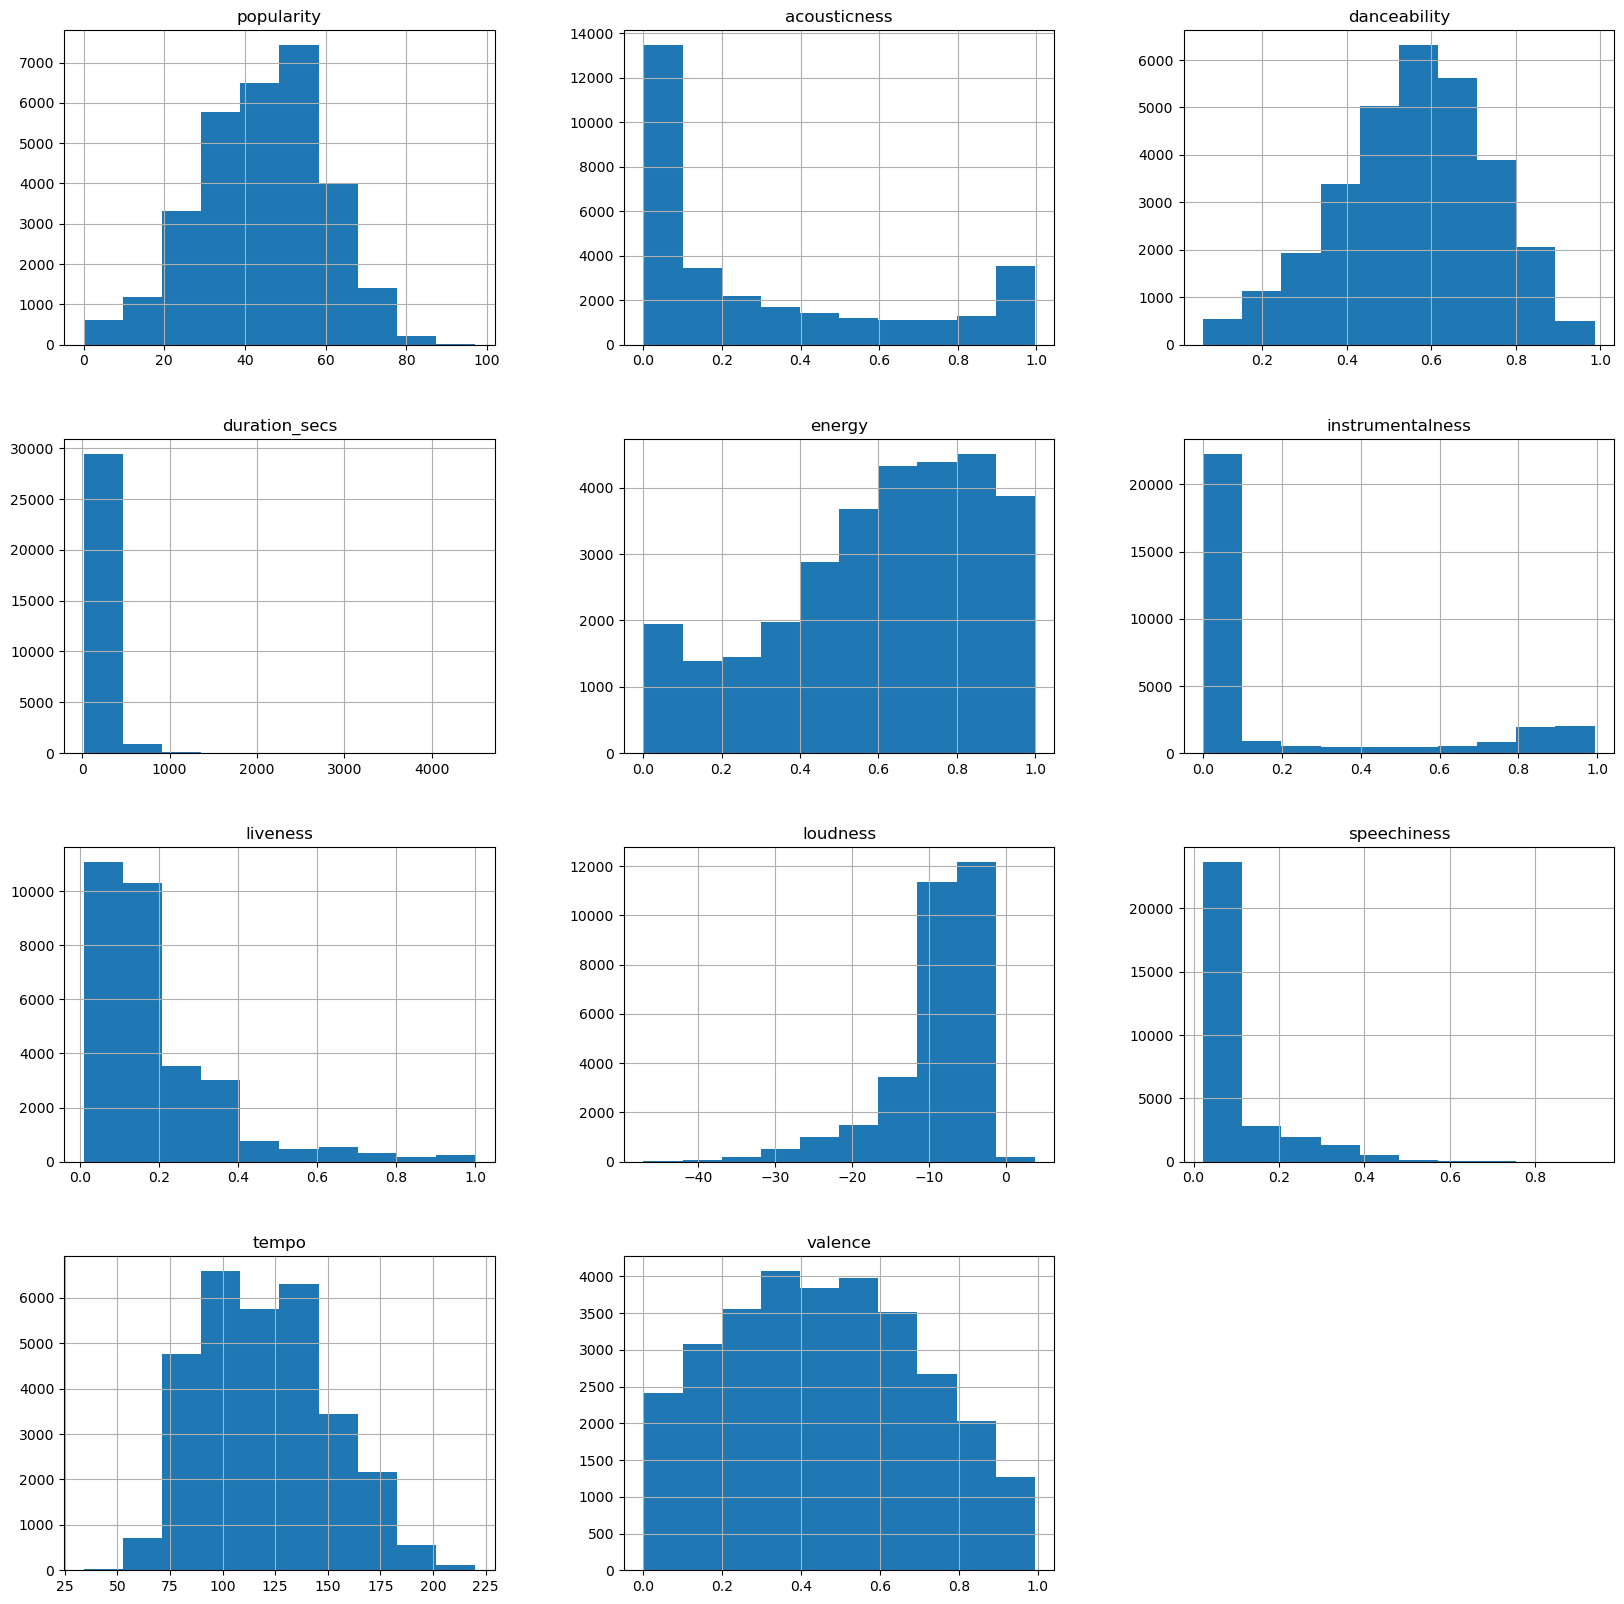

In [6]:
# histograms of training data
histograms = train_df.hist(figsize=(20, 20))

In [7]:
train_features = df.drop(['music_genre'], axis=1)
# Descriptive Statistics
print("*****************************************************************")
for col in train_features:
    print("{} mean = {}".format(col, np.mean(train_features[col])))
    print("{} median = {}".format(col, np.median(train_features[col])))
    print("{} standard deviation = {}".format(col, np.std(train_features[col])))
    print("*****************************************************************")

*****************************************************************
popularity mean = 44.27667652859961
popularity median = 45.0
popularity standard deviation = 15.545424893143942
*****************************************************************
acousticness mean = 0.3059741035929516
acousticness median = 0.144
acousticness standard deviation = 0.34110332264925447
*****************************************************************
danceability mean = 0.5584182766272172
danceability median = 0.569
danceability standard deviation = 0.1786497836060359
*****************************************************************
duration_secs mean = 245.4895286982257
duration_secs median = 227.533
duration_secs standard deviation = 110.12004811266449
*****************************************************************
energy mean = 0.6003298356755435
energy median = 0.644
energy standard deviation = 0.26449726088010944
*****************************************************************
instrumentalness mean = 

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [9]:
knn_model = KNeighborsClassifier(5)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 5:')
print(metrics.classification_report(training_labels,predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 5:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))




training set when k = 5:
              precision    recall  f1-score   support

 Alternative       0.41      0.61      0.49      3037
       Anime       0.70      0.77      0.73      3066
       Blues       0.51      0.54      0.52      3022
   Classical       0.81      0.77      0.79      3002
     Country       0.50      0.49      0.49      3040
  Electronic       0.56      0.44      0.49      2974
     Hip-Hop       0.47      0.54      0.50      3034
        Jazz       0.57      0.41      0.48      3087
         Rap       0.50      0.49      0.49      3084
        Rock       0.55      0.44      0.49      3074

    accuracy                           0.55     30420
   macro avg       0.56      0.55      0.55     30420
weighted avg       0.56      0.55      0.55     30420

[[1851   20   44    7  250  106  244   98  201  216]
 [  88 2354  240  115   66  128   10   52    4    9]
 [ 210  349 1617   81  203  224   45  200   43   50]
 [  69  179  171 2317   43   57   13  141    1   11]
 [ 5

In [10]:
knn_model = KNeighborsClassifier(1000)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 1000:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 1000:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))


training set when k = 5:
              precision    recall  f1-score   support

 Alternative       0.41      0.61      0.49      3037
       Anime       0.70      0.77      0.73      3066
       Blues       0.51      0.54      0.52      3022
   Classical       0.81      0.77      0.79      3002
     Country       0.50      0.49      0.49      3040
  Electronic       0.56      0.44      0.49      2974
     Hip-Hop       0.47      0.54      0.50      3034
        Jazz       0.57      0.41      0.48      3087
         Rap       0.50      0.49      0.49      3084
        Rock       0.55      0.44      0.49      3074

    accuracy                           0.55     30420
   macro avg       0.56      0.55      0.55     30420
weighted avg       0.56      0.55      0.55     30420

[[1851   20   44    7  250  106  244   98  201  216]
 [  88 2354  240  115   66  128   10   52    4    9]
 [ 210  349 1617   81  203  224   45  200   43   50]
 [  69  179  171 2317   43   57   13  141    1   11]
 [ 5

In [11]:
knn_model = KNeighborsClassifier(1000)

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
knn_model.fit(training_features, training_labels)

predicted = knn_model.predict(training_features)

print('training set when k = 1000:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

predicted = knn_model.predict(testing_features)
print('testing set when k = 1000:')
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set when k = 1000:
              precision    recall  f1-score   support

 Alternative       0.26      0.23      0.24      3037
       Anime       0.48      0.49      0.49      3066
       Blues       0.32      0.19      0.24      3022
   Classical       0.52      0.46      0.49      3002
     Country       0.26      0.46      0.33      3040
  Electronic       0.26      0.28      0.27      2974
     Hip-Hop       0.27      0.16      0.20      3034
        Jazz       0.25      0.28      0.26      3087
         Rap       0.32      0.23      0.27      3084
        Rock       0.31      0.39      0.34      3074

    accuracy                           0.32     30420
   macro avg       0.32      0.32      0.31     30420
weighted avg       0.32      0.32      0.31     30420

[[ 713   75   24   57  871  254  201  277  158  407]
 [  56 1513  413  255  190  389    7  235    0    8]
 [ 109  417  564  216  596  509   47  458   30   76]
 [  43  424  257 1379  181  268   17  413   10   10]
 

In [12]:
from sklearn.naive_bayes import GaussianNB

In [13]:
model = GaussianNB()
training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
model.fit(training_features, training_labels)
predicted = model.predict(training_features)

print('training set:')
print(metrics.classification_report(training_labels, predicted))
print(metrics.confusion_matrix(training_labels, predicted))

print('testing set:')
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']
predicted = model.predict(testing_features)
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       0.37      0.15      0.21      3037
       Anime       0.66      0.38      0.48      3066
       Blues       0.44      0.19      0.27      3022
   Classical       0.66      0.86      0.75      3002
     Country       0.26      0.78      0.39      3040
  Electronic       0.52      0.41      0.46      2974
     Hip-Hop       0.42      0.38      0.40      3034
        Jazz       0.44      0.30      0.36      3087
         Rap       0.43      0.48      0.46      3084
        Rock       0.52      0.39      0.44      3074

    accuracy                           0.43     30420
   macro avg       0.47      0.43      0.42     30420
weighted avg       0.47      0.43      0.42     30420

[[ 460    9   51   28 1408  138  283  130  166  364]
 [  78 1172  161  555  854  168    4   64    1    9]
 [ 105  242  584  106 1411  184   17  284    6   83]
 [  49   67   33 2589   78   72    0  109    0    5]
 [  39   29   8

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
forest_model = RandomForestClassifier()

training_features = train_df.drop(['music_genre'], axis=1)
training_labels = train_df['music_genre']
forest_model.fit(training_features, training_labels)

forest_predicted = forest_model.predict(training_features)

print('training set:')
print(metrics.classification_report(training_labels, forest_predicted))
print(metrics.confusion_matrix(training_labels, forest_predicted))

print('testing set:')
testing_features = test_df.drop(['music_genre'], axis=1)
testing_labels = test_df['music_genre']

predicted = forest_model.predict(testing_features)
print(metrics.classification_report(testing_labels, predicted))
print(metrics.confusion_matrix(testing_labels, predicted))

training set:
              precision    recall  f1-score   support

 Alternative       1.00      1.00      1.00      3037
       Anime       1.00      1.00      1.00      3066
       Blues       1.00      0.99      1.00      3022
   Classical       1.00      1.00      1.00      3002
     Country       0.99      0.98      0.98      3040
  Electronic       0.99      0.99      0.99      2974
     Hip-Hop       0.89      0.89      0.89      3034
        Jazz       0.99      0.99      0.99      3087
         Rap       0.89      0.88      0.88      3084
        Rock       0.97      0.98      0.98      3074

    accuracy                           0.97     30420
   macro avg       0.97      0.97      0.97     30420
weighted avg       0.97      0.97      0.97     30420

[[3031    0    4    0    0    0    0    0    0    2]
 [   0 3066    0    0    0    0    0    0    0    0]
 [  15    0 3005    0    0    0    0    0    0    2]
 [   0    0    0 3001    0    0    0    1    0    0]
 [   0    0    